In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# Generate synthetic data with 2D features
X, y = make_blobs(n_samples=200, centers=2, random_state=42, cluster_std=2.5)

In [4]:
# Modify one feature to have a much larger scale
X[:, 1] = X[:, 1] * 100

In [5]:
X.shape

(200, 2)

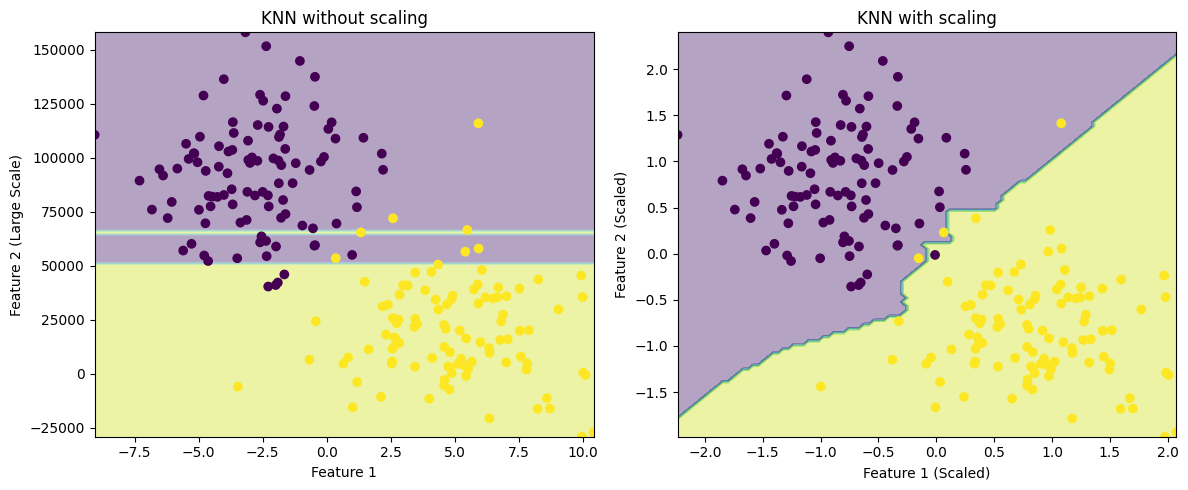

In [8]:


# Train a KNN classifier without scaling
knn_no_scaling = KNeighborsClassifier(n_neighbors=3)
knn_no_scaling.fit(X, y)

# Apply feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train a KNN classifier with scaling
knn_with_scaling = KNeighborsClassifier(n_neighbors=3)
knn_with_scaling.fit(X_scaled, y)

# Visualize decision boundary
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Without scaling
xx, yy = np.meshgrid(np.linspace(X[:, 0].min(), X[:, 0].max(), 100), 
                     np.linspace(X[:, 1].min(), X[:, 1].max(), 100))
Z = knn_no_scaling.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[0].contourf(xx, yy, Z, alpha=0.4)
ax[0].scatter(X[:, 0], X[:, 1], c=y)
ax[0].set_title('KNN without scaling')
ax[0].set_xlabel('Feature 1')
ax[0].set_ylabel('Feature 2 (Large Scale)')

# With scaling
xx, yy = np.meshgrid(np.linspace(X_scaled[:, 0].min(), X_scaled[:, 0].max(), 100), 
                     np.linspace(X_scaled[:, 1].min(), X_scaled[:, 1].max(), 100))
Z = knn_with_scaling.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
ax[1].contourf(xx, yy, Z, alpha=0.4)
ax[1].scatter(X_scaled[:, 0], X_scaled[:, 1], c=y)
ax[1].set_title('KNN with scaling')
ax[1].set_xlabel('Feature 1 (Scaled)')
ax[1].set_ylabel('Feature 2 (Scaled)')

plt.tight_layout()
plt.show()


**Without Scaling**: When KNN is applied without scaling, the decision boundary is heavily influenced by Feature 2 due to its large scale. This isn't ideal as it doesn't capture the natural patterns in the data.

**With Scaling**: After scaling the features, KNN's decision boundary is more reflective of the inherent data distribution. This is because both features now have similar influence when computing distances.

In conclusion, when using algorithms like KNN, feature scaling ensures that all features contribute equally to the outcome. Without scaling, features with larger scales can dominate the decision-making process, leading to suboptimal results.

## Incorrect way: Scaling Before Train/Test Split

In [7]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

# Load data
data = load_breast_cancer()
X = data.data
y = data.target

# Incorrect Scaling: Before train/test split
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

print("Scaling done before train/test split!")

Scaling done before train/test split!


## Correct Way: Scaling After Train/Test Split

In [8]:
# Splitting the data first
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Correct Scaling: After train/test split
# Fit on training data and transform training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# IMPORTANT: Use only transform on test data
X_test_scaled = scaler.transform(X_test)

print("Scaling done after train/test split!")

Scaling done after train/test split!
